<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/DIP_BlockTruncationCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def ds_subplot(nrows,ncols, idx, img, title ):
  plt.subplot(nrows,ncols, idx)
  plt.title(title)
  plt.imshow(img,cmap='gray')
  plt.axis('off')

In [ ]:
def btc_encode(blk):
  """
  This function will calculate the coefficient and bitmap of the BTC Algorithm.
  """
  blk_size  = blk.size
  
  blk_mean  = np.mean(blk)
  
  blk_sigma = np.std(blk)

  bit_map = np.where(blk>=blk_mean,1,0)

  return bit_map, blk_mean, blk_sigma

def btc_decode(bit_map,blk_mean,blk_sigma) :
  blk_size  = blk.size
  q = blk[np.where(blk > blk_mean)].shape[0] # the number of 1's in the bitmap
  p = blk_size - q # the number of 0's in the bitmap.

  qp_ratio = np.sqrt(p/q)
  nv_q = np.round(blk_mean + blk_sigma / qp_ratio,0)
  nv_p = np.round(blk_mean - blk_sigma * qp_ratio,0)
  blk_decoded = np.where(bit_map==1,nv_q,nv_p)

  return blk_decoded    
    

In [87]:
np.random.seed(23)
blk = np.random.randint(0,255,size=(4,4))

ret = btc_encode(blk)

In [88]:
blk

array([[ 83, 230,  40, 201],
       [182, 232,  31, 237],
       [204,  91,  39,  90],
       [153, 179,   6, 123]])

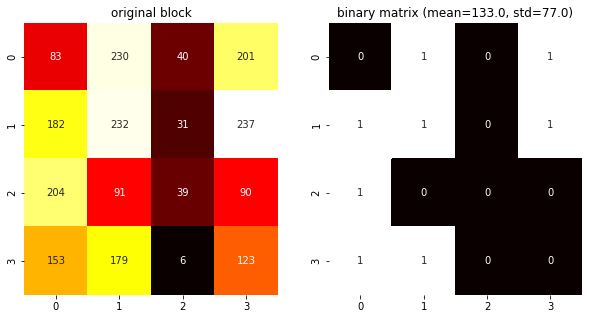

In [104]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('original block')
sns.heatmap(blk, annot=True, fmt='g', cmap='hot', cbar=False)
plt.subplot(122)
plt.title(f'binary matrix (mean={np.round(ret[1])}, std={np.round(ret[2])})')
sns.heatmap(ret[0], annot=True, fmt='g', cmap='hot', cbar=False)

In [66]:
ret

(array([[[0, 1, 0],
         [1, 1, 1],
         [0, 1, 1],
         [0, 0, 0]],
 
        [[1, 1, 0],
         [0, 1, 0],
         [0, 1, 1],
         [1, 1, 1]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [1, 0, 1],
         [1, 1, 0]],
 
        [[1, 0, 0],
         [1, 0, 1],
         [0, 1, 0],
         [1, 1, 1]]]), 126.39583333333333, 74.77152409823022)

In [ ]:
blk_d = btc_decode(*ret)

In [ ]:
blk_d

array([[ 56., 210.,  56., 210.],
       [210., 210.,  56., 210.],
       [210.,  56.,  56.,  56.],
       [210., 210.,  56.,  56.]])

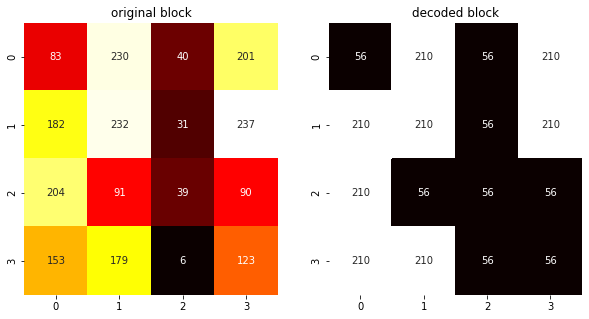

In [105]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('original block')
sns.heatmap(blk, annot=True, fmt='g', cmap='hot', cbar=False)
plt.subplot(122)
plt.title(f'decoded block')
sns.heatmap(blk_d, annot=True, fmt='g', cmap='hot', cbar=False)

In [ ]:
blk

array([[ 83, 230,  40, 201],
       [182, 232,  31, 237],
       [204,  91,  39,  90],
       [153, 179,   6, 123]])

In [28]:
import cv2
import matplotlib.pyplot as plt

(512, 512)


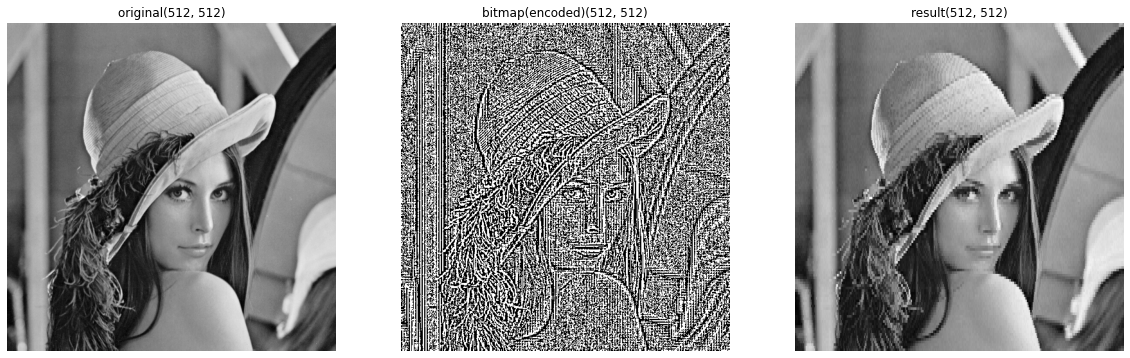

In [86]:
# config 
w_blk = h_blk = 4

# load image
img = cv2.imread('Lenna512.png',cv2.IMREAD_GRAYSCALE)


# padding
w = img.shape[1]
h = img.shape[0]
pw = w_blk - w%w_blk if w%w_blk != 0 else 0
ph = h_blk - h%h_blk if h%h_blk != 0 else 0
img_padded = cv2.copyMakeBorder(img, 0,ph,0,pw, cv2.BORDER_REFLECT)
print(img_padded.shape)



# encoding
bitmap = np.zeros_like(img_padded,dtype=bool)
coef_list = []

for i in range(0, img.shape[0], h_blk):
  tmp = []
  for j in range(0, img.shape[1], w_blk):
    bitmap[i: i + h_blk, j: j + w_blk], *coef = btc_encode(img_padded[i: i + h_blk, j: j + w_blk])
    tmp.append(coef)
  coef_list.append(tmp)

# decoding
img_decoded = np.zeros_like(bitmap,dtype=np.float32)
for i_idx, i in enumerate(range(0, bitmap.shape[0], h_blk)):
  # print(len(coef_list[i_idx]))
  for j_idx, j in enumerate(range(0, bitmap.shape[1], w_blk)):
    # print(j_idx)
    img_decoded[i: i + h_blk, j: j + w_blk], *coef = btc_decode(bitmap[i: i + h_blk, j: j + w_blk],*(coef_list[i_idx][j_idx]))

# recover original shape
if img.ndim == 2:
  ret = img_decoded[:img.shape[0],:img.shape[1]].copy()
else:
  ret = img_decoded[:img.shape[0],:img.shape[1],:].copy()

# display
plt.figure(figsize=(20,60))
ds_subplot(1,3,1,img,f'original{img.shape}')
ds_subplot(1,3,2,bitmap,f'bitmap(encoded){bitmap.shape}')
ds_subplot(1,3,3,ret, f'result{ret.shape}')